# Name:- 

## Parth Suhas Mane

## Problem Statement:-

Prepare a classification model using Naive Bayes
for salary data

Data Description:

age -- age of a person

workclass -- A work class is a grouping of work

education -- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation -- occupation of an individuals

relationship --

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual

## Import Libraries

In [14]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

In [2]:
#load the dataset
salary_train=pd.read_csv('SalaryData_Train.csv.crdownload')
salary_test=pd.read_csv('SalaryData_Test.csv')

In [3]:
#view training set
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
#check shape of training set
salary_train.shape

(22988, 14)

In [5]:
#check Test set
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
#check shape of test set
salary_test.shape

(15060, 14)

## EDA & Visualization

## 1. Train Dataset

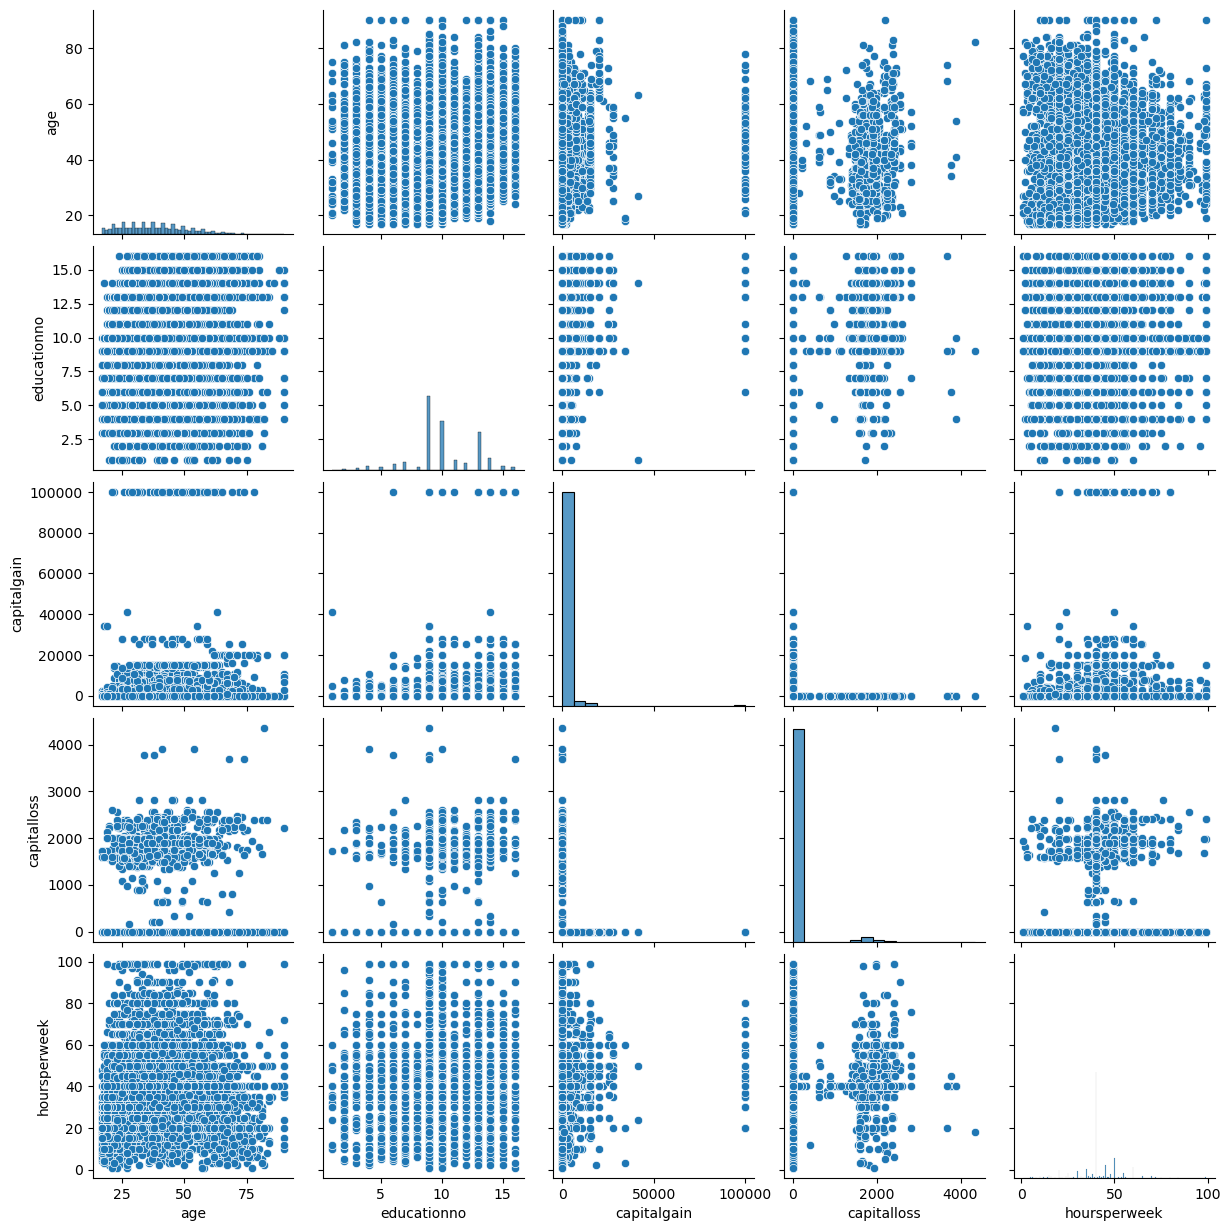

In [7]:
#plot pairplot of training set
sns.pairplot(salary_train)

There is no relationship between Features

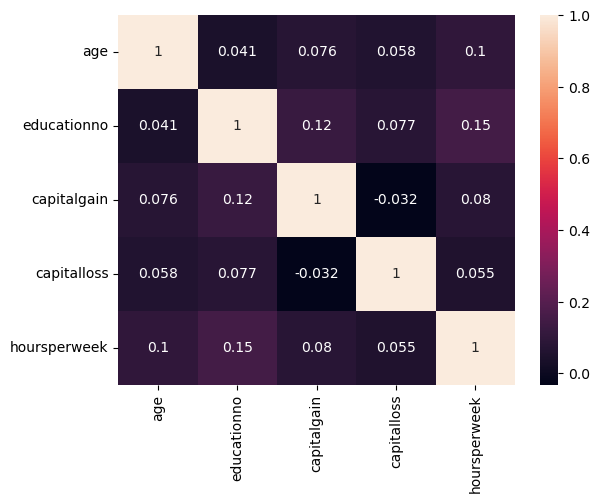

In [8]:
#generate heatmap
sns.heatmap(salary_train.corr(), annot=True)
plt.show()

In [9]:
#View summary of  Train Dataset.
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22988 entries, 0 to 22987
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            22988 non-null  int64  
 1   workclass      22988 non-null  object 
 2   education      22987 non-null  object 
 3   educationno    22987 non-null  float64
 4   maritalstatus  22987 non-null  object 
 5   occupation     22987 non-null  object 
 6   relationship   22987 non-null  object 
 7   race           22987 non-null  object 
 8   sex            22987 non-null  object 
 9   capitalgain    22987 non-null  float64
 10  capitalloss    22987 non-null  float64
 11  hoursperweek   22987 non-null  float64
 12  native         22987 non-null  object 
 13  Salary         22987 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.5+ MB




There are 9 Categorical Variables and 5 Numerical variables.

In [22]:
#check missing values
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      1
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           0
Salary           0
dtype: int64

In [34]:
salary_train['educationno'] = salary_train['educationno'].fillna(method='ffill')
salary_train['capitalgain'] = salary_train['capitalgain'].fillna(method='ffill')
salary_train['capitalloss'] = salary_train['capitalloss'].fillna(method='ffill')
salary_train['hoursperweek'] = salary_train['hoursperweek'].fillna(method='ffill')

In [33]:
#check missing values
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Hence we have filled all the null values using fillna function.

## 2. Test Dataset

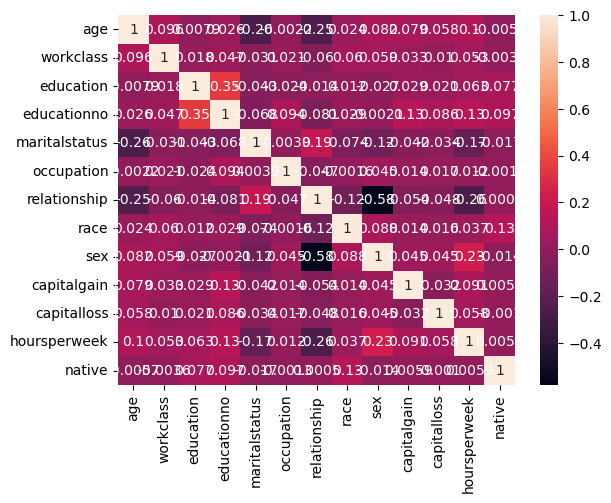

In [60]:
#generate heatmap
sns.heatmap(salary_test.corr(), annot=True,)
plt.show()

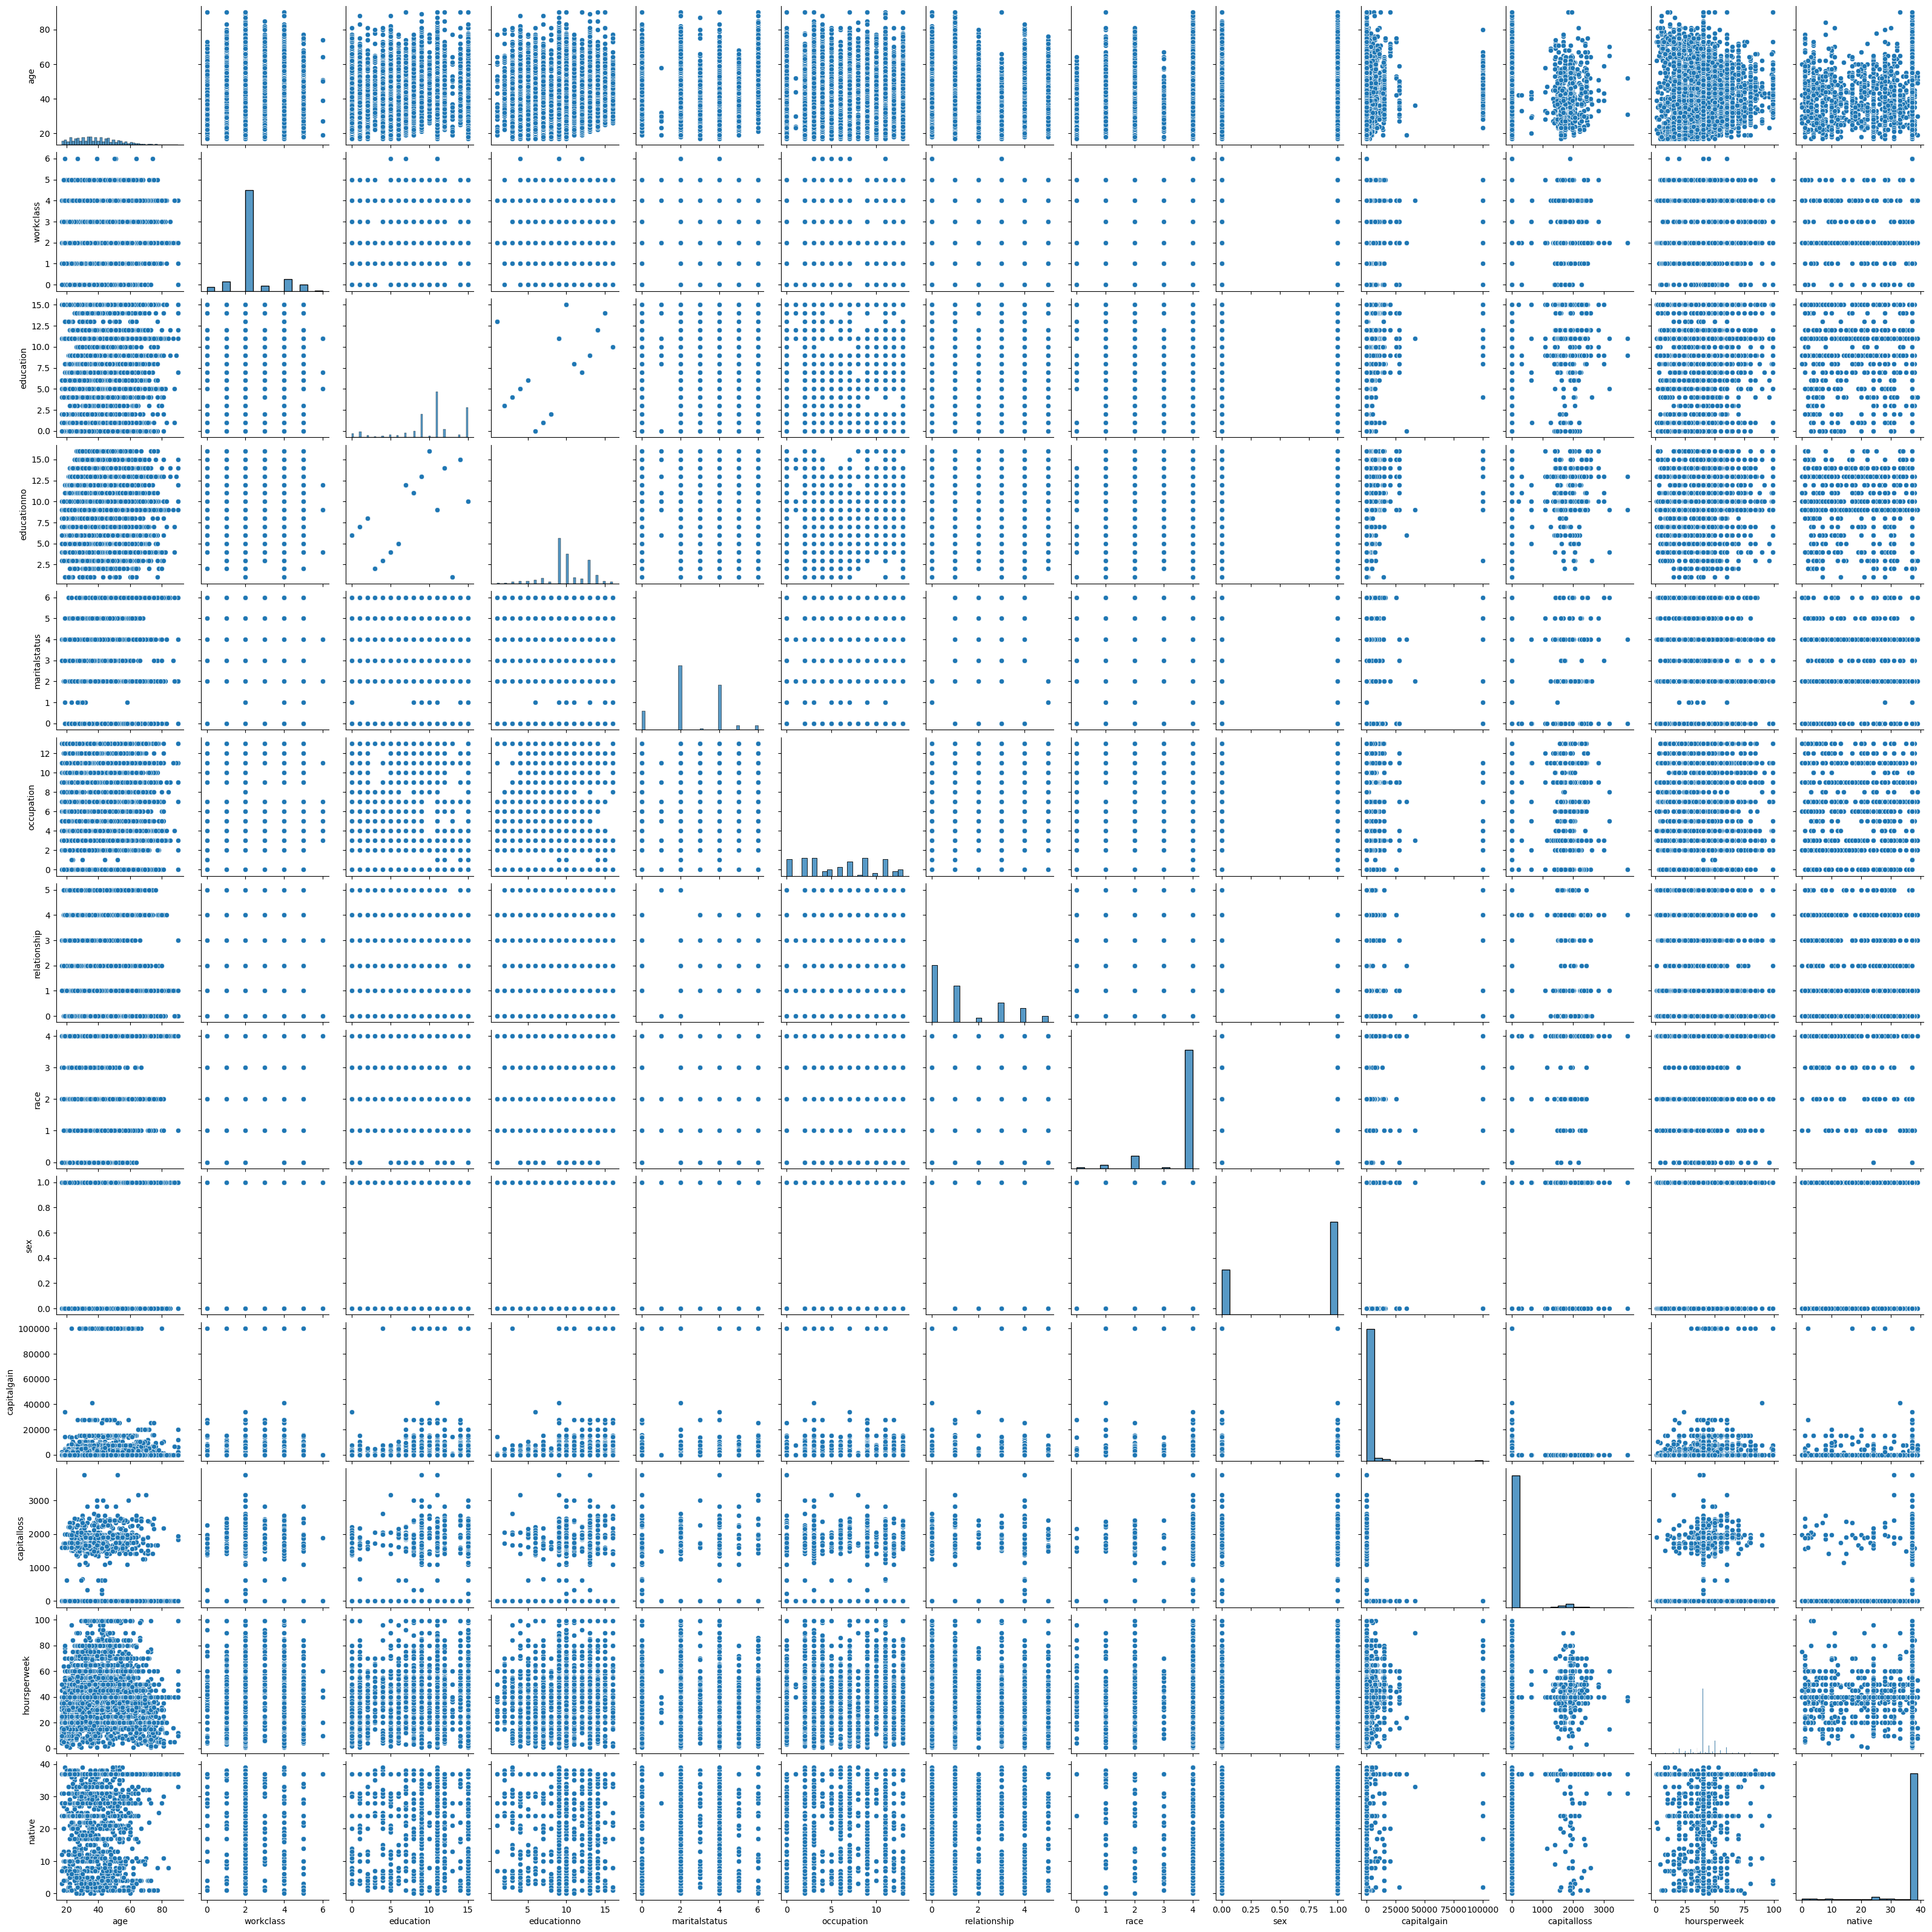

In [58]:
#plot pairplot of training set
sns.pairplot(salary_test)
plt.show()

We can see high correlation between two features education and educationno

In [35]:
#View summary of  Test Dataset.
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  int32 
 2   education      15060 non-null  int32 
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  int32 
 5   occupation     15060 non-null  int32 
 6   relationship   15060 non-null  int32 
 7   race           15060 non-null  int32 
 8   sex            15060 non-null  int32 
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  int32 
 13  Salary         15060 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 1.1+ MB


There are 13 Numerical and 1 Categorical variable

In [36]:
#check missing values
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

There are no missing values

In [37]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [38]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [39]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

## Encoding using Label encoder

In [61]:
# label encoding
label_encoder=preprocessing.LabelEncoder()
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])

In [41]:
# splitting the data into x_train,y_train
col_names=list(salary_train.columns)
train_X=salary_train[col_names[0:13]]
train_Y=salary_train[col_names[13]]
test_x=salary_test[col_names[0:13]]
test_y=salary_test[col_names[13]]

## Model Training

### 1. By using Gaussian Naive bayes

In [42]:
# gaussian NB
Gmodel=GaussianNB()
train_pred_gau=Gmodel.fit(train_X,train_Y).predict(train_X)

In [43]:
# fitting on train data and predicting on test data
test_pred_gau=Gmodel.fit(train_X,train_Y).predict(test_x)

In [44]:
# accuracy score on train data using gaussian NB
train_acc_gau=np.mean(train_pred_gau==train_Y)
train_acc_gau

0.7966765268835915

In [45]:
# accuracy score  on test data using gaussian NB
test_acc_gau=np.mean(test_pred_gau==test_y)
test_acc_gau

0.795816733067729

We train our data on salary_train dataset(training set) but now we have predict on salary_test dataset(testing set) which is unknown for model ,we got 79% test accuracy.

In [46]:
# confusion matrix for gaussian model 
from  sklearn.metrics import confusion_matrix,classification_report
cfm = confusion_matrix(test_y,test_pred_gau)
print(cfm)

[[10789   571]
 [ 2504  1196]]


In [47]:
# classification_report matrix for 
clf = classification_report(test_y,test_pred_gau)
print(clf)

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88     11360
        >50K       0.68      0.32      0.44      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.80      0.77     15060



f1-score indicates that the Gaussian Naive bayes model has 80% accuracy

### 2. By using Multinominal Naive Bayes

In [48]:
# creating modle using multinomial naive bayes
Mmodel=MultinomialNB()
train_pred_multi=Mmodel.fit(train_X,train_Y).predict(train_X)

In [49]:
# fitting on train data and predict on test_data
test_pred_multi=Mmodel.fit(train_X,train_Y).predict(test_x)

In [50]:
# accuaracy of train data using multinomial NB
train_acc_multi=np.mean(train_pred_multi==train_Y)
train_acc_multi

0.7727945014790325

In [51]:
# accuracy of test data using multinomial NB
test_acc_multi=np.mean(test_pred_multi==test_y)
test_acc_multi

0.7749667994687915

We train our data on salary_train dataset(training set) but now we have predict on salary_test dataset(testing set) which is unknown for model ,we got 77% test accuracy.

In [52]:
# confusion matrix for multinomial model 
CFM = confusion_matrix(test_y,test_pred_multi)
CFM

array([[10891,   469],
       [ 2920,   780]], dtype=int64)

In [53]:
# classification report for multinomial NB
CLF = classification_report(test_y,test_pred_multi)
print(CLF)

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



f1-score indicates that the Multinomial Naive bayes model has 77% accuracy

## Conclusion
 Multinomial Naive bayes model has 77% accuracy whereas Gaussian Naive bayes model has 80% accuracy
 
 So we conclude that Gaussian Naive Bayes model performs better than Multinomial Naive Bayes model
